### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [348]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [349]:
data = pd.read_csv('data/coupons.csv')

In [350]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [326]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [327]:
# Clean the data remove coloums car and replace Nan with never
del data['car']
data['Bar'].fillna('never',inplace=True)
data['CoffeeHouse'].fillna('never',inplace=True)
data['CarryAway'].fillna('never',inplace=True)
data['Restaurant20To50'].fillna('never',inplace=True)
data['RestaurantLessThan20'].fillna('never',inplace=True)
data.replace({'never': '0', 'less1': '0','gt8':'8-Or-More'},inplace=True)
# Calc numbers of coupons for each category
data.groupby('coupon')['coupon'].value_counts()

coupon                 coupon               
Bar                    Bar                      2017
Carry out & Take away  Carry out & Take away    2393
Coffee House           Coffee House             3996
Restaurant(20-50)      Restaurant(20-50)        1492
Restaurant(<20)        Restaurant(<20)          2786
Name: coupon, dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [328]:
Acept_coupon = data.query("Y ==1")['Y'].count()
print(f"proportion of the total observations chose to accept the coupon: {Acept_coupon}")

proportion of the total observations chose to accept the coupon: 7210


5. Use a bar plot to visualize the `coupon` column.

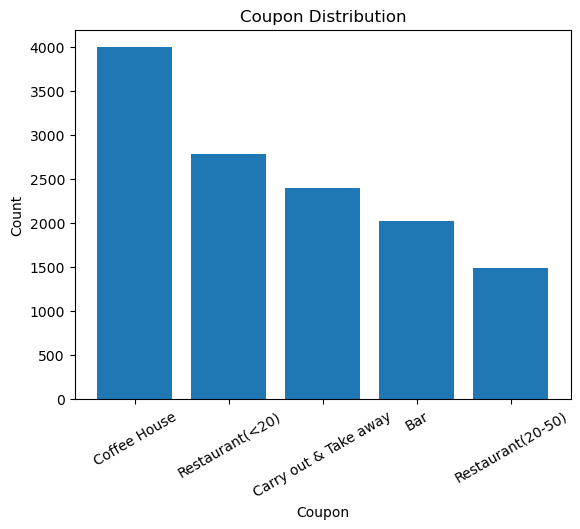

In [112]:
coupon_counts = data['coupon'].value_counts()
plt.bar(coupon_counts.index, coupon_counts.values)
# Add labels and a title
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.title('Coupon Distribution')
plt.xticks(rotation=30)
# Show the plot
plt.show()

6. Use a histogram to visualize the temperature column.

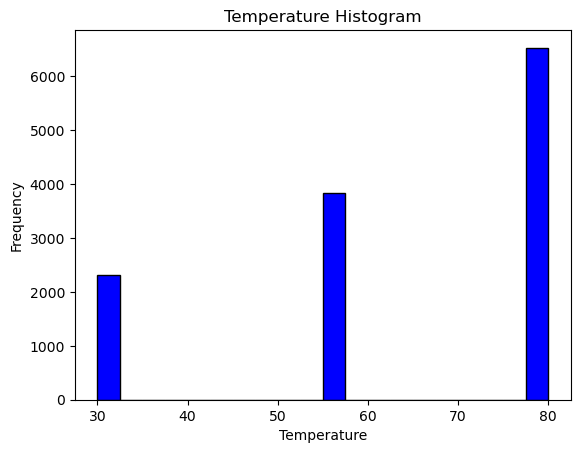

In [290]:
plt.hist(data['temperature'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Histogram')
plt.show()

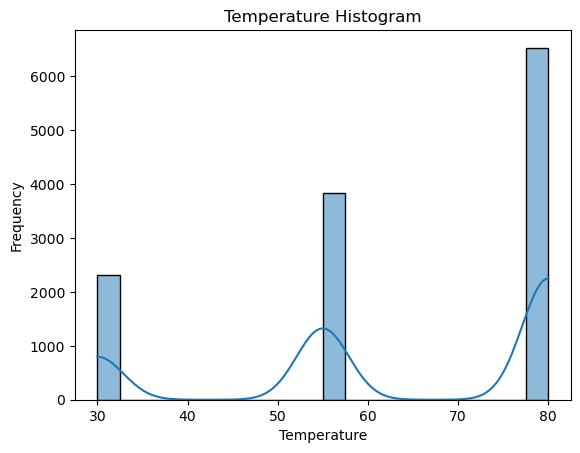

In [293]:
sns.histplot(data['temperature'], bins=20,kde=True)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Histogram')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [270]:
Data_Barcoupons = data.query("coupon == 'Bar'")
Data_Barcoupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,0,0,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,0,0,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,0,0,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,0,4~8,4~8,0,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,0,4~8,4~8,0,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [227]:
Acept_BarCoupon = Data_Barcoupons.query("Y ==1")['Y'].count()
print(f"proportion of bar coupons were accepted : {Acept_BarCoupon}")

proportion of bar coupons were accepted : 827


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


## Data_less_than_or_equal_3 = data.query("Bar == '0' or Bar == '1-3'")
Data_more_than_3 = data.query("Bar == '4~8' or Bar == '8-Or-More'")
Accept_rate_less_3 = Data_less_than_or_equal_3['Y'].mean()
Accept_rate_more_3 = Data_more_than_3['Y'].mean()
print(f"Acceptance Rate for 3 or Fewer Times: {Accept_rate_less_3:.2%}")
print(f"Acceptance Rate for More than 3 Times: {Accept_rate_more_3:.2%}")

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [262]:
Data_Going_Bar_more_than_one_grt25 = data.query("Bar != '0' and age > '25'")
Data_Going_Bar_more_than_one_less25 = data.query("Bar != '0' and age <= '25'")
acceptance_rate_grt25 = Data_Going_Bar_more_than_one_grt25['Y'].mean()
acceptance_rate_less25 = Data_Going_Bar_more_than_one_less25['Y'].mean()
diff = abs(acceptance_rate_grt25 - acceptance_rate_less25)
print(f"Acceptance Rate for Drivers Going to a Bar More than Once a Month and Over 25: {acceptance_rate_grt25:.2%}")
print(f"Acceptance Rate for All Other Drivers: {acceptance_rate_less25:.2%}")
print(f"The differnce in acceptance rate between drivers over 25 to the all others: {diff:.2%}")


Acceptance Rate for Drivers Going to a Bar More than Once a Month and Over 25: 62.14%
Acceptance Rate for All Other Drivers: 62.41%
The differnce in acceptance rate between drivers over 25 to the all others: 0.27%


## 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [245]:
Data_Going_Bar_more_than_one_selected = data.query("Bar != '0' and passanger != 'Kid(s)' and occupation not in ['farming','fishing','forestry']")
Data_Going_Bar_more_than_one_other = data.query("not (Bar != '0' and passanger != 'Kid(s)' and occupation not in ['farming','fishing','forestry'])")
acceptance_rate_selected = Data_Going_Bar_more_than_one_selected['Y'].mean()
acceptance_rate_other = Data_Going_Bar_more_than_one_other['Y'].mean()
diff_2 = abs(acceptance_rate_selected - acceptance_rate_other)
print(f"Acceptance Rate for Drivers Going to Bars More than Once a Month and Meeting Criteria: {acceptance_rate_selected:.2%}")
print(f"Acceptance Rate for All Other Drivers: {acceptance_rate_other:.2%}")
print(f"The differnce in difference in acceptance rates between the two groups: {diff_2:.2%}")
#Data_Going_Bar_more_than_one_other.shape
#data.shape

Acceptance Rate for Drivers Going to Bars More than Once a Month and Meeting Criteria: 62.31%
Acceptance Rate for All Other Drivers: 54.60%
The differnce in acceptance rate between drivers over 25 to the all others: 7.72%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [322]:
data_cond1 = data.query("Bar != '0' and passanger != 'Kid(s)' and maritalStatus !='widowed'")
data_cond2 = data.query("Bar != '0' and age < '30'")
data_cond3 = data.query("RestaurantLessThan20 in ['4~8','8-Or-More']  and income in ['$50000 - $62499','$62500 - $74999','$75000 - $87499','$87500 - $99999','$100000 or More']")
acceptance_rate1 = data_cond1['Y'].mean()
acceptance_rate2 = data_cond2['Y'].mean()
acceptance_rate3 = data_cond3['Y'].mean()
print(f"Acceptance Rate for go to the bar once, no kid and not widowed: {acceptance_rate1:.2%}")
print(f"Acceptance Rate for go to the bar once and are under the age of 30: {acceptance_rate2:.2%}")
print(f"Acceptance Rate for go to cheap restaurants more than 4 times and income is less than 50K: {acceptance_rate3:.2%}")

Acceptance Rate for go to the bar once, no kid and not widowed: 62.31%
Acceptance Rate for go to the bar once and are under the age of 30: 62.85%
Acceptance Rate for go to cheap restaurants more than 4 times and income is less than 50K: 58.20%


## 7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Acceptance Rate for Bar coupon: 41.00%


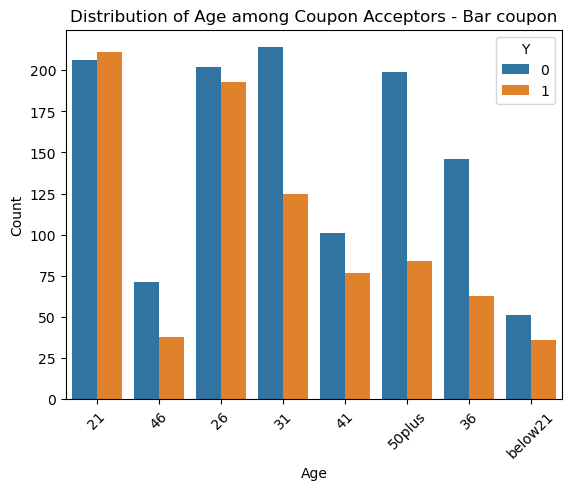

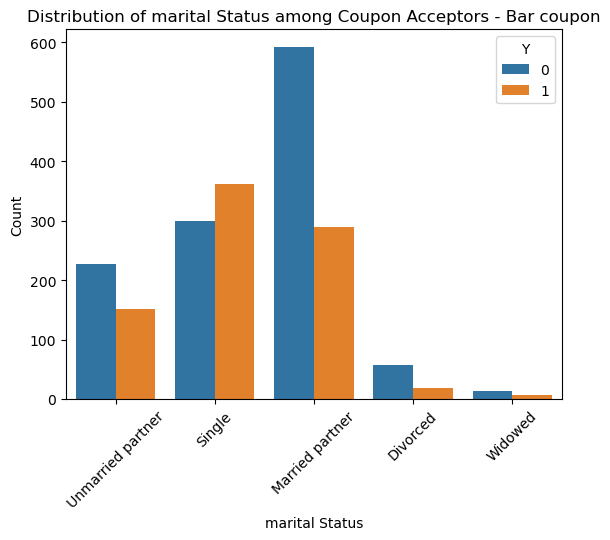

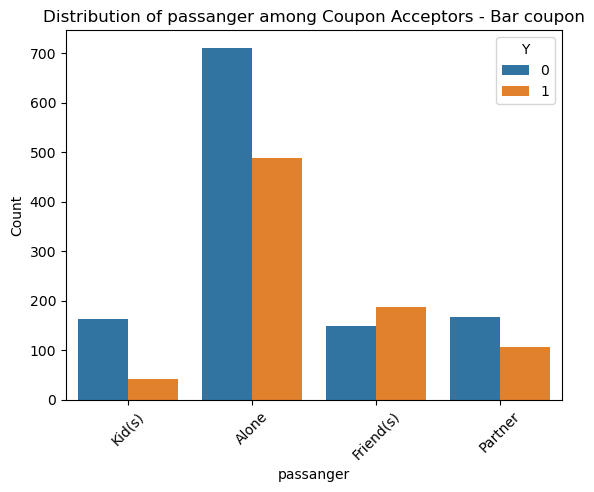

drivers who accepted the bar coupons is go to bars more than once a month and are under the age of 30 which 62.85%


In [344]:
# Looking into Bar coupons
acceptance_rate_Bar = Data_Barcoupons['Y'].mean()
print(f"Acceptance Rate for Bar coupon: {acceptance_rate_Bar:.2%}")
sns.countplot(data=Data_Barcoupons, x='age', hue='Y')
plt.title("Distribution of Age among Coupon Acceptors - Bar coupon")
plt.xticks(rotation=45)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()
sns.countplot(data=Data_Barcoupons, x='maritalStatus', hue='Y')
plt.title("Distribution of marital Status among Coupon Acceptors - Bar coupon")
plt.xticks(rotation=45)
plt.xlabel("marital Status")
plt.ylabel("Count")
plt.show()
sns.countplot(data=Data_Barcoupons, x='passanger', hue='Y')
plt.title("Distribution of passanger among Coupon Acceptors - Bar coupon")
plt.xticks(rotation=45)
plt.xlabel("passanger")
plt.ylabel("Count")
plt.show()
print("drivers who accepted the bar coupons is go to bars more than once a month and are under the age of 30 which 62.85%")

proportion of Coffee House coupons were accepted : 1995
Acceptance Rate for Coffee_House: 49.92%


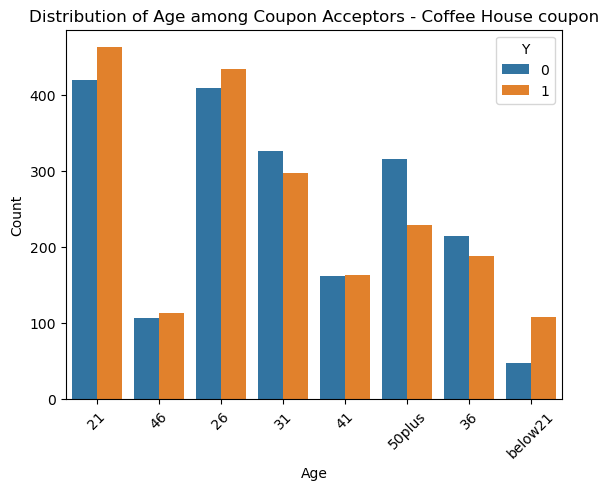

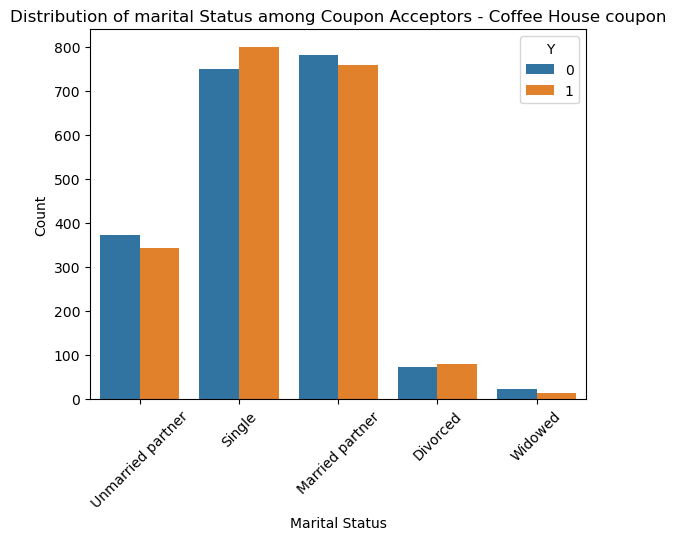

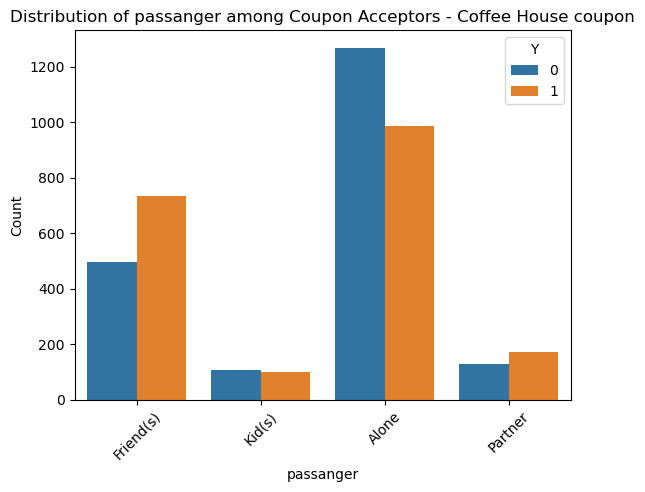

In [347]:
# Looking into coupon Coffee_House
Data_coupon_Coffee_House = data.query("coupon == 'Coffee House'")
How_Many_Accept_Coffee_House = Data_coupon_Coffee_House.query("Y ==1")['Y'].count()
print(f"proportion of Coffee House coupons were accepted : {How_Many_Accept_Coffee_House}")
#calcute  acceptance_rate
acceptance_rate_Coffee_House = Data_coupon_Coffee_House['Y'].mean()
print(f"Acceptance Rate for Coffee_House: {acceptance_rate_Coffee_House:.2%}")
sns.countplot(data=Data_coupon_Coffee_House, x='age', hue='Y')
plt.title("Distribution of Age among Coupon Acceptors - Coffee House coupon")
plt.xticks(rotation=45)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()
sns.countplot(data=Data_coupon_Coffee_House, x='maritalStatus', hue='Y')
plt.title("Distribution of marital Status among Coupon Acceptors - Coffee House coupon")
plt.xticks(rotation=45)
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()
sns.countplot(data=Data_coupon_Coffee_House, x='passanger', hue='Y')
plt.title("Distribution of passanger among Coupon Acceptors - Coffee House coupon")
plt.xticks(rotation=45)
plt.xlabel("passanger")
plt.ylabel("Count")
plt.show()

proportion of  Restaurant under $20 coupons were accepted : 1970
Acceptance Rate for Restaurant ubder $20: 70.71%


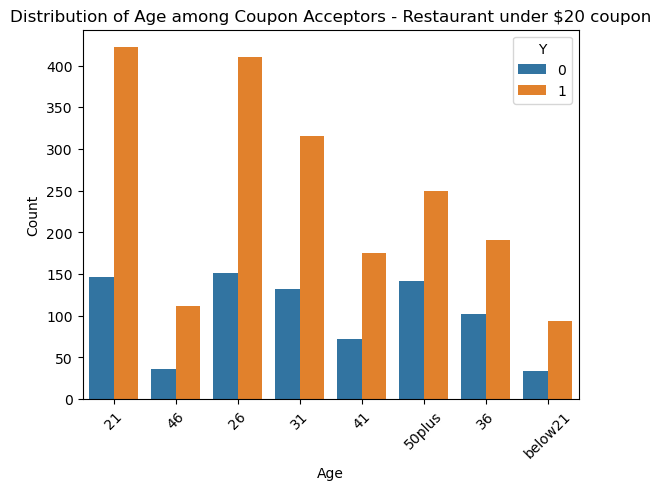

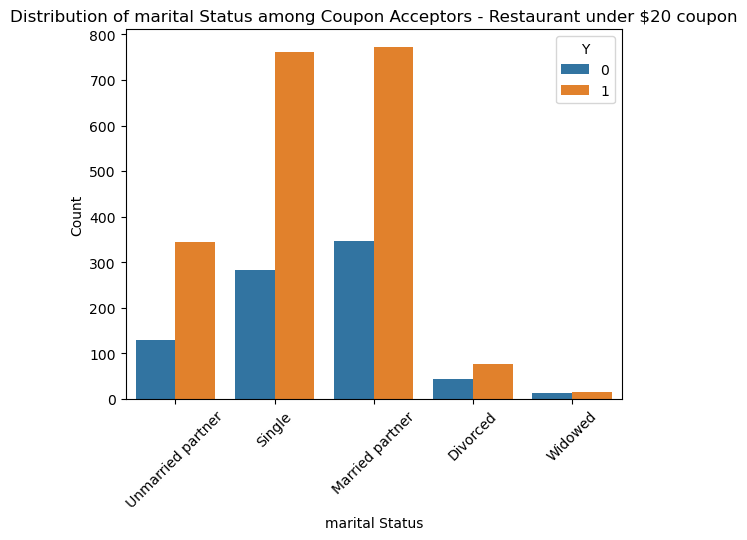

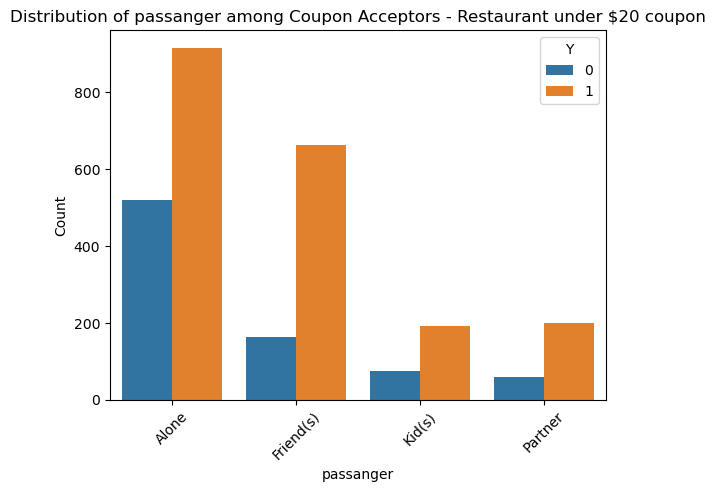

In [332]:
# Looking into coupon Restaurant under $20
Data_coupon_Restaurant_20 = data.query("coupon == 'Restaurant(<20)'")
How_Many_Accept_Restaurant_20 = Data_coupon_Restaurant_20.query("Y ==1")['Y'].count()
print(f"proportion of  Restaurant under $20 coupons were accepted : {How_Many_Accept_Restaurant_20}")
#calcute  acceptance_rate
acceptance_rate_Restaurant_20 = Data_coupon_Restaurant_20['Y'].mean()
print(f"Acceptance Rate for Restaurant ubder $20: {acceptance_rate_Restaurant_20:.2%}")

sns.countplot(data=Data_coupon_Restaurant_20, x='age', hue='Y')
plt.title("Distribution of Age among Coupon Acceptors - Restaurant under $20 coupon")
plt.xticks(rotation=45)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()
sns.countplot(data=Data_coupon_Restaurant_20, x='maritalStatus', hue='Y')
plt.title("Distribution of marital Status among Coupon Acceptors - Restaurant under $20 coupon")
plt.xticks(rotation=45)
plt.xlabel("marital Status")
plt.ylabel("Count")
plt.show()
sns.countplot(data=Data_coupon_Restaurant_20, x='passanger', hue='Y')
plt.title("Distribution of passanger among Coupon Acceptors - Restaurant under $20 coupon")
plt.xticks(rotation=45)
plt.xlabel("passanger")
plt.ylabel("Count")
plt.show()

proportion of  Restaurant between $20 and $50 coupons were accepted : 658
Acceptance Rate for Restaurant betweeb $20 and $50: 44.10%


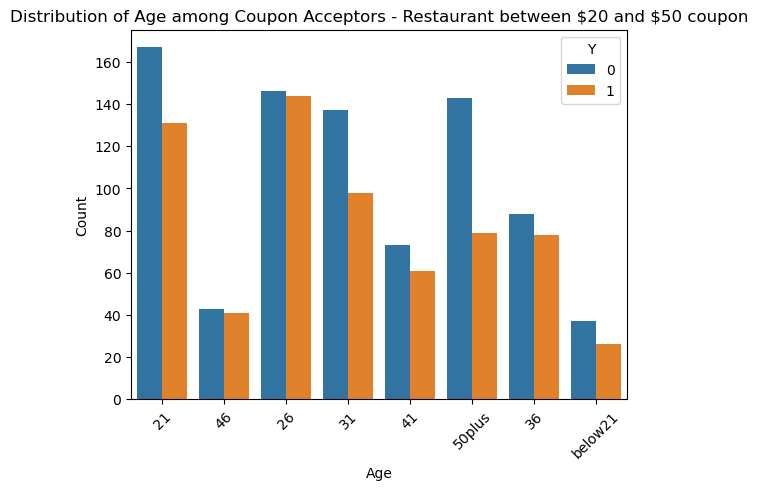

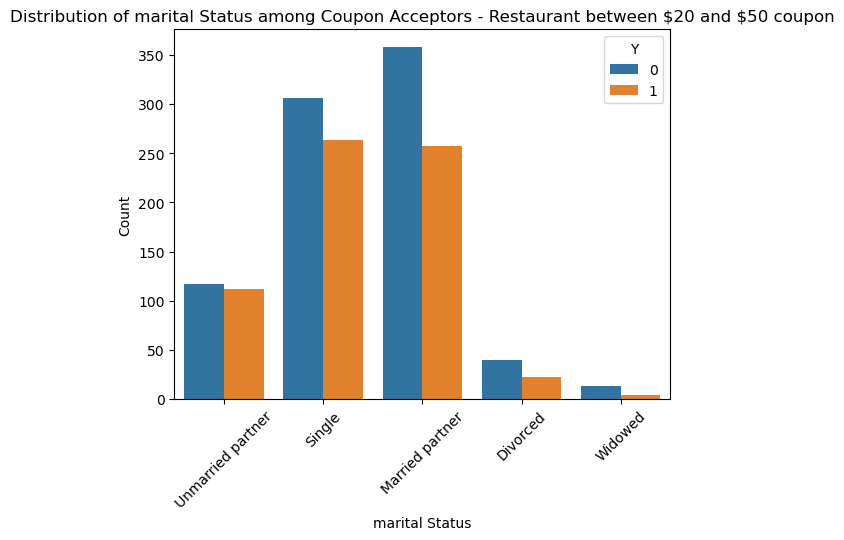

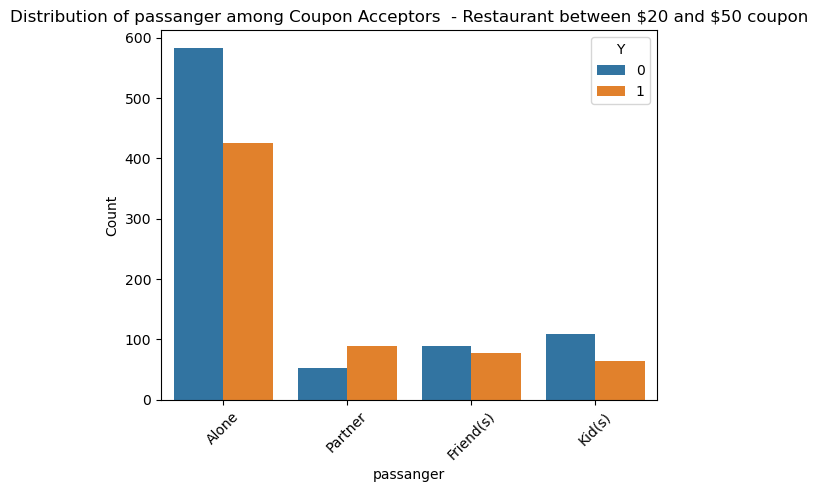

In [340]:
# Looking into coupon Restaurant between $20 and $50
Data_coupon_Restaurant_20_50 = data.query("coupon == 'Restaurant(20-50)'")
How_Many_Accept_Restaurant_20_50 = Data_coupon_Restaurant_20_50.query("Y ==1")['Y'].count()
print(f"proportion of  Restaurant between $20 and $50 coupons were accepted : {How_Many_Accept_Restaurant_20_50}")
#calcute  acceptance_rate
acceptance_rate_Restaurant_20_50 = Data_coupon_Restaurant_20_50['Y'].mean()
print(f"Acceptance Rate for Restaurant betweeb $20 and $50: {acceptance_rate_Restaurant_20_50:.2%}")

sns.countplot(data=Data_coupon_Restaurant_20_50, x='age', hue='Y')
plt.title("Distribution of Age among Coupon Acceptors - Restaurant between \$20 and \$50 coupon")
plt.xticks(rotation=45)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()
sns.countplot(data=Data_coupon_Restaurant_20_50, x='maritalStatus', hue='Y')
plt.title("Distribution of marital Status among Coupon Acceptors - Restaurant between \$20 and \$50 coupon")
plt.xticks(rotation=45)
plt.xlabel("marital Status")
plt.ylabel("Count")
plt.show()
sns.countplot(data=Data_coupon_Restaurant_20_50, x='passanger', hue='Y')
plt.title("Distribution of passanger among Coupon Acceptors  - Restaurant between \$20 and \$50 coupon")
plt.xticks(rotation=45)
plt.xlabel("passanger")
plt.ylabel("Count")
plt.show()

proportion of  Carry out & Take away  coupons were accepted : 658
Acceptance Rate for Data_coupon_Take_away: 44.10%


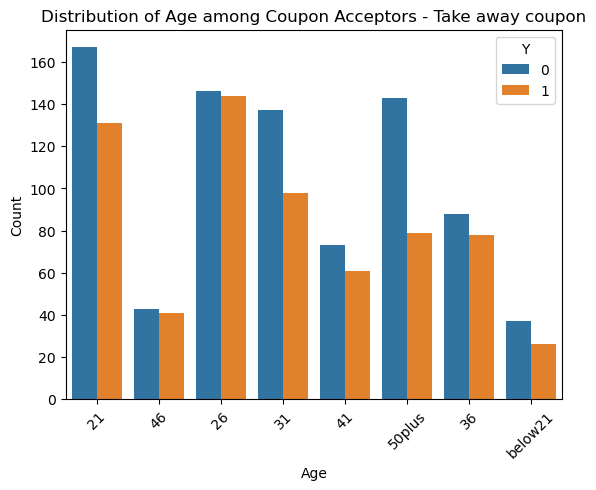

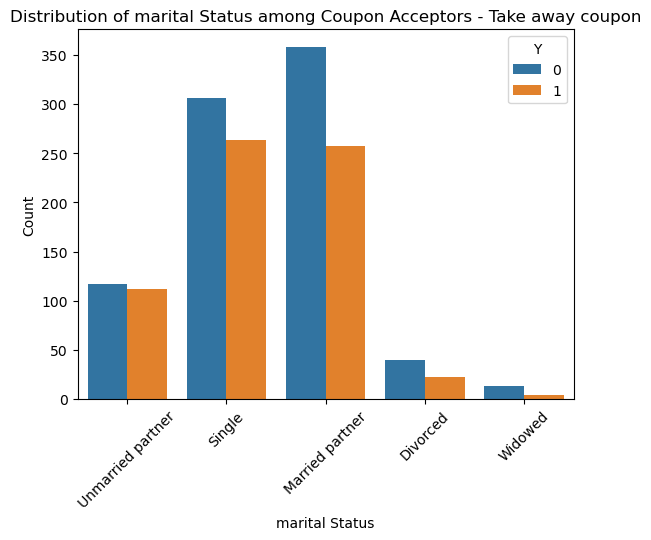

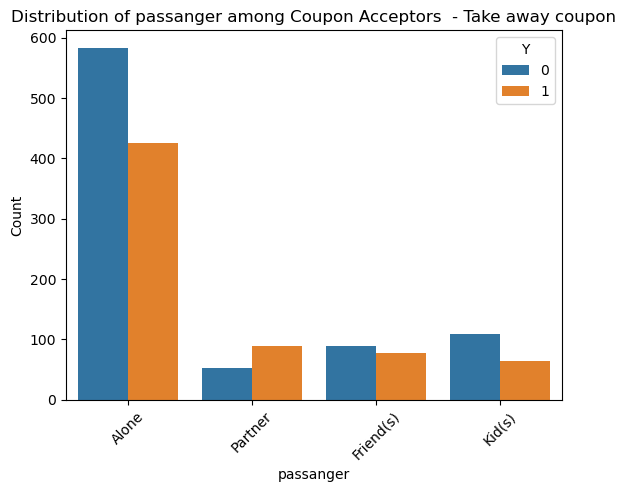

In [341]:
# Looking into coupon Carry out & Take away
Data_coupon_Take_away = data.query("coupon == 'Restaurant(20-50)'")
How_Many_Accept_Take_away = Data_coupon_Take_away.query("Y ==1")['Y'].count()
print(f"proportion of  Carry out & Take away  coupons were accepted : {How_Many_Accept_Take_away:}")
#calcute  acceptance_rate
acceptance_rate_Take_away = Data_coupon_Take_away['Y'].mean()
print(f"Acceptance Rate for Data_coupon_Take_away: {acceptance_rate_Restaurant_20_50:.2%}")

sns.countplot(Data_coupon_Take_away, x='age', hue='Y')
plt.title("Distribution of Age among Coupon Acceptors - Take away coupon")
plt.xticks(rotation=45)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()
sns.countplot(data=Data_coupon_Take_away, x='maritalStatus', hue='Y')
plt.title("Distribution of marital Status among Coupon Acceptors - Take away coupon")
plt.xticks(rotation=45)
plt.xlabel("marital Status")
plt.ylabel("Count")
plt.show()
sns.countplot(data=Data_coupon_Take_away, x='passanger', hue='Y')
plt.title("Distribution of passanger among Coupon Acceptors  - Take away coupon")
plt.xticks(rotation=45)
plt.xlabel("passanger")
plt.ylabel("Count")
plt.show()